In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk import word_tokenize

In [2]:
# Valence aware dictionary for sentiment reasoning = VADER
# nltk.download('vader_lexicon')

In [3]:
# -----------------------------------------------------------------------
df = pd.read_csv("emoji_df.csv")
df= df.head(500)

In [17]:
example = df["name"][50]
tokens = word_tokenize(example, language = "english")
# tokens = word_tokenize("I am bad", language = "english")

tokens[:10]

['face', 'with', 'head-bandage']

In [18]:
from nltk.sentiment import SentimentIntensityAnalyzer
# for show progressbar
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()
sia.polarity_scores("I am so good")

{'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.4927}

In [6]:
res = {}
for i , row in tqdm(df.iterrows() ,total= len(df)):
    text = row['name']
    myid = row['index']
    res[myid] = sia.polarity_scores(text)
    

  0%|          | 0/97 [00:00<?, ?it/s]

In [7]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'index'})
vaders = vaders.merge(df,how='left')

In [8]:
vaders[["index","neg","neu","pos","compound","name"]]


,index,neg,neu,pos,compound,name
0,0,0.000,0.286,0.714,0.3612,grinning face
1,1,0.000,0.615,0.385,0.3612,grinning face with big eyes
2,2,0.000,0.353,0.647,0.6705,grinning face with smiling eyes
3,3,0.000,0.571,0.429,0.4588,beaming face with smiling eyes
4,4,0.000,0.444,0.556,0.3612,grinning squinting face
...,...,...,...,...,...,...
92,92,0.767,0.233,0.000,-0.5106,angry face
93,93,0.000,1.000,0.000,0.0000,face with symbols on mouth
94,94,0.000,0.500,0.500,0.4588,smiling face with horns
95,95,0.524,0.476,0.000,-0.5106,angry face with horns


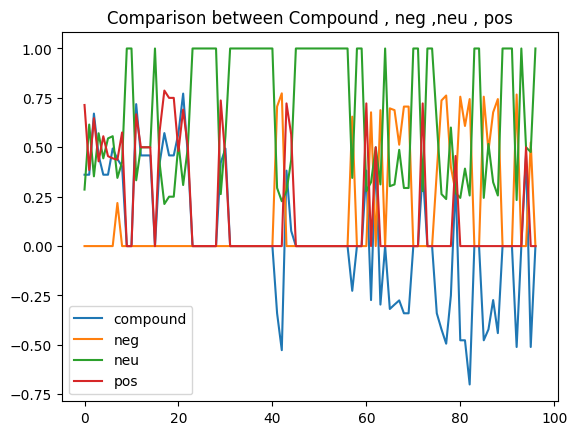

In [9]:
x = vaders["compound"]
x1 = vaders["neg"]
x2= vaders["neu"]
x3 = vaders["pos"]

plt.plot(x,label="compound")
plt.plot(x1,label="neg")
plt.plot(x2,label="neu")
plt.plot(x3,label="pos")

plt.title('Comparison between Compound , neg ,neu , pos')
plt.legend(loc="lower left")

plt.show()


# Text With Emoji .

In [10]:
df = pd.read_csv("emoji_df.csv")
df= df.head(500)

In [11]:
example = df["emoji"][50]
tokens = word_tokenize(example, language = "english")
# tokens = word_tokenize("I am 🤗", language = "english")

tokens[:10]

['🤕face', 'with', 'head-bandage']

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()
sia.polarity_scores("grinning face with smiling eyes 😄")

{'neg': 0.0, 'neu': 0.353, 'pos': 0.647, 'compound': 0.6705}

In [13]:
res = {}
for i , row in tqdm(df.iterrows() ,total= len(df)):
    text = row['emoji']
    myid = row['index']
    res[myid] = sia.polarity_scores(text)
    

  0%|          | 0/97 [00:00<?, ?it/s]

In [14]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'index'})
vaders = vaders.merge(df,how='left')

In [15]:
vaders[["index","neg","neu","pos","compound","emoji"]]


,index,neg,neu,pos,compound,emoji
0,0,0.0,1.000,0.000,0.0000,😀grinning face
1,1,0.0,1.000,0.000,0.0000,😃grinning face with big eyes
2,2,0.0,0.571,0.429,0.4588,😄grinning face with smiling eyes
3,3,0.0,0.571,0.429,0.4588,😁beaming face with smiling eyes
4,4,0.0,1.000,0.000,0.0000,😆grinning squinting face
...,...,...,...,...,...,...
92,92,0.0,1.000,0.000,0.0000,😠angry face
93,93,0.0,1.000,0.000,0.0000,🤬face with symbols on mouth
94,94,0.0,1.000,0.000,0.0000,😈smiling face with horns
95,95,0.0,1.000,0.000,0.0000,👿angry face with horns


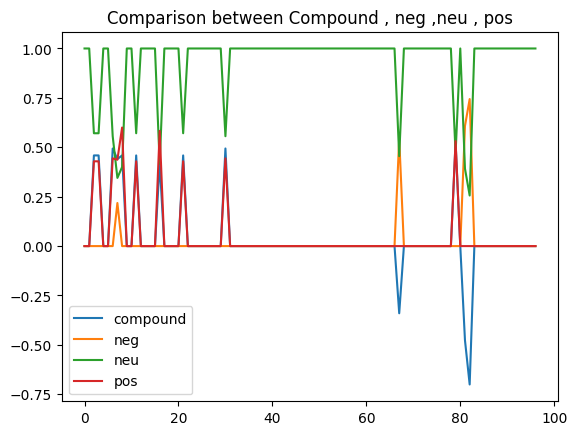

In [16]:
x = vaders["compound"]
x1 = vaders["neg"]
x2= vaders["neu"]
x3 = vaders["pos"]

plt.plot(x,label="compound")
plt.plot(x1,label="neg")
plt.plot(x2,label="neu")
plt.plot(x3,label="pos")

plt.title('Comparison between Compound , neg ,neu , pos')
plt.legend(loc="lower left")

plt.show()
